`Objective`:
You are provided hourly rental data spanning two years.   
For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. 

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

`Input Features`:<br>
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']<br>
       
`Target`:<br>
['count']<br>

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
!pip3 install seaborn==0.9.0

     |████████████████████████████████| 215kB 2.7MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [130]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime


In [3]:
## load the data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [131]:
## read the data sets
df_train = pd.read_csv("train.csv") 
# , index_col=0, parse_dates=['datetime']
# parse_dates parameter to convince pandas to turn things into real datetime types
display(df_train.head(3))

df_test = pd.read_csv("test.csv")
display(df_test.head(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [132]:
## Data Information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [133]:
## Data Information
print("Rows      : ", df_train.shape[0])
print("Columns   : ", df_train.shape[1])
print("\nFeatures : \n", df_train.columns.to_list())
print("\nMissing values in each column: \n", df_train.isnull().sum()) ## .any()
print("\nUnique values : \n", df_train.nunique())

Rows      :  10886
Columns   :  12

Features : 
 ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Missing values in each column: 
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Unique values : 
 datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64


In [134]:
## Description of train dataset
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [135]:
## plotly plot

fig = px.line(df_train, x = 'datetime', y = 'count', title = 'Bike counts with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [136]:
## Bike counts with date-time
fig = px.line(df_train, x = 'datetime', y = 'count', title = 'Bike counts with Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '2y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

In [137]:
## Bike count with season

print(df_train['season'].value_counts(dropna=False))
fig = px.line(df_train, x = 'datetime', y = 'season', title = 'Bike counts with Slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list(
            [
             dict(count = 1, label = '1y', step = "year", stepmode = 'backward'),
             dict(count = 2, label = '2y', step = "year", stepmode = 'backward'),
             dict(step = "all"),
            ]
        )
    )
)

fig.show()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64


In [138]:
## read the data sets
train = pd.read_csv("train.csv", index_col=0, parse_dates=['datetime']) 
# parse_dates parameter to convince pandas to turn things into real datetime types
display(train.head())

test = pd.read_csv("test.csv", index_col=0, parse_dates=['datetime'])
display(test.head())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [139]:
##  Extract year, month, day, dayofweek, and hour features from datetime

def add_features(df):
    # df['year'] = pd.DatetimeIndex(df['datetime']).year
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

## Add new features
add_features(train)
add_features(test)

# ## check dataframes
display(train.head(3))
display(test.head(3))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2


In [140]:
## checking years
train['year'].unique()

array([2011, 2012])

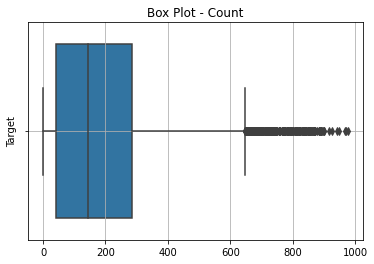

In [141]:
## Target Variable Analysis
sns.boxplot([train['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

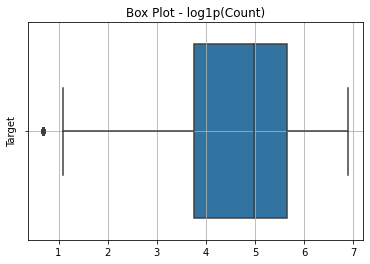

In [142]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
sns.boxplot([train['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

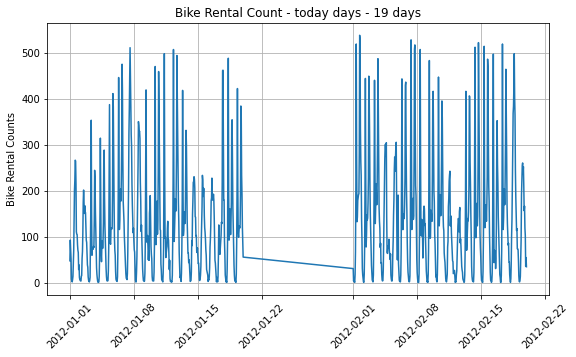

In [143]:
## According to question the data records are given only first 19 days of each month
## Lets check the missing data which days in month - 19 days
## for 2012 -- for January and February
## Month to month trend
plt.figure(figsize=(9,5))
plt.title("Bike Rental Count - today days - 19 days")
plt.plot(train['2012-01' : '2012-02']['count'])
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()

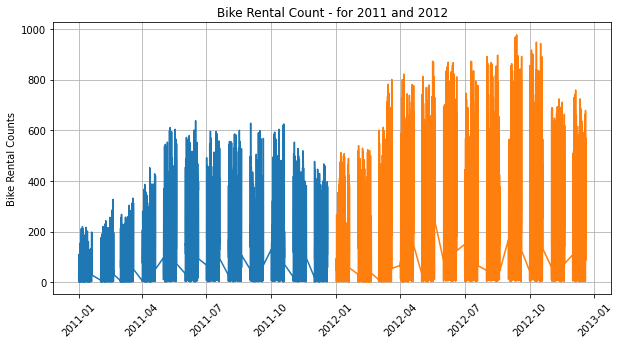

In [144]:
## Year to year trend
plt.figure(figsize=(10,5))
plt.title("Bike Rental Count - for 2011 and 2012")
plt.plot(train['2011']['count'], label='2011')
plt.plot(train['2012']['count'], label='2012')
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()

-- We can clearly see the total days - 19 days gap between `2012-01-22` to `2012-02-01`

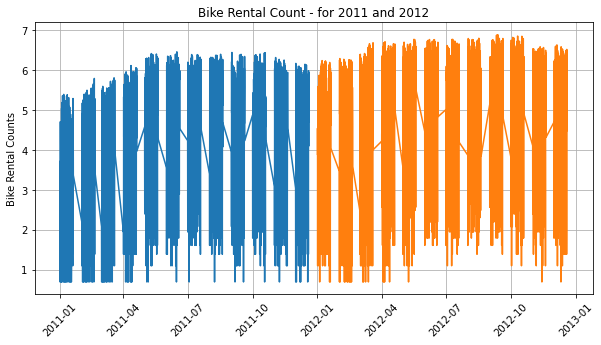

In [145]:
## Year to year trend
plt.figure(figsize=(10,5))
plt.title("Bike Rental Count - for 2011 and 2012")
plt.plot(train['2011']['count'].map(np.log1p), label='2011')
plt.plot(train['2012']['count'].map(np.log1p), label='2012')
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()

### It will be good idea to train the model using log transformed target feature `count`

We will do after exploring data


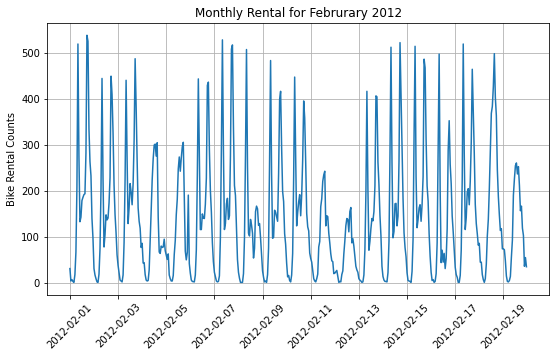

In [146]:
## Monthly rental -- 19 days only
plt.figure(figsize=(9,5))
plt.title("Monthly Rental for Februrary 2012")
plt.plot(train['2012-02']['count'])
plt.xticks(rotation=45)
plt.ylabel("Bike Rental Counts")
plt.grid(True)
plt.show()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64


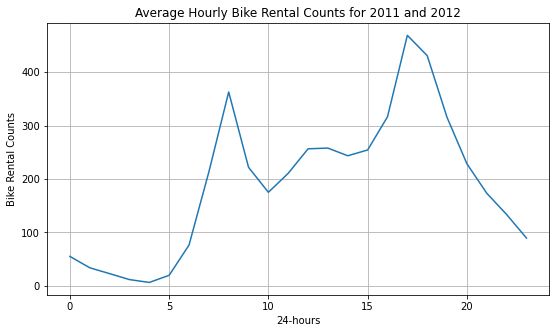

In [147]:
## Average hourly bike rental for both 2011 and 2012
hourly = train.groupby(['hour'])
avg_hour = hourly['count'].mean()
print(avg_hour)

# plot
plt.figure(figsize=(9,5))
plt.title("Average Hourly Bike Rental Counts for 2011 and 2012")
plt.plot(avg_hour.index, avg_hour)
plt.xlabel("24-hours")
plt.ylabel("Bike Rental Counts")
plt.grid(True)
plt.show()

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64


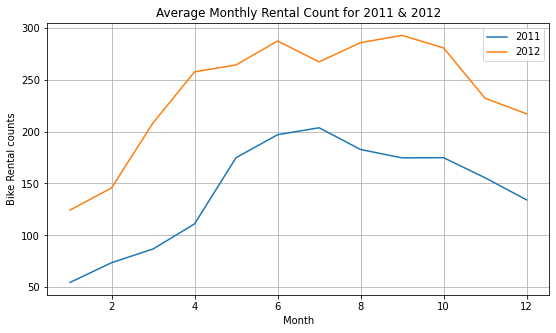

In [148]:
## Average monthly bike rental for both 2011 and 2012
yearly_monthly = train.groupby(['year', 'month'])
avg_yearly_monthly = yearly_monthly['count'].mean()
print(avg_yearly_monthly)

# plot
plt.figure(figsize=(9,5))
for year in avg_yearly_monthly.index.levels[0]:
    plt.plot(avg_yearly_monthly[year].index, avg_yearly_monthly[year], label=year)
plt.title("Average Monthly Rental Count for 2011 & 2012")
plt.xlabel("Month")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

year  hour
2011  0        43.563877
      1        26.831858
      2        19.307692
      3        10.056872
      4         5.255814
      5        14.517857
      6        57.519824
      7       157.110132
      8       264.973568
      9       164.488987
      10      131.867841
      11      156.577093
      12      192.188596
      13      191.991228
      14      182.486842
      15      187.701754
      16      236.907895
      17      353.855263
      18      322.043860
      19      236.017544
      20      173.324561
      21      134.118421
      22      103.833333
      23       69.605263
2012  0        66.662281
      1        40.824561
      2        26.396476
      3        13.373874
      4         7.497797
      5        24.925439
      6        94.916667
      7       268.877193
      8       460.135965
      9       278.820175
      10      218.127193
      11      264.535088
      12      320.828947
      13      323.583333
      14      304.399123
      15      

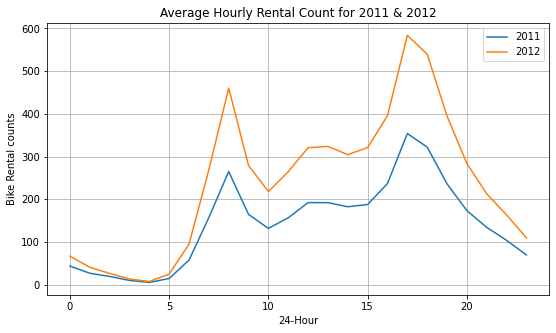

In [149]:
## Average hourly bike rental for both 2011 and 2012
yearly_hourly = train.groupby(['year', 'hour'])
avg_yearly_hourly = yearly_hourly['count'].mean()
print(avg_yearly_hourly)

# plot
plt.figure(figsize=(9,5))
for year in avg_yearly_hourly.index.levels[0]:
    plt.plot(avg_yearly_hourly[year].index, avg_yearly_hourly[year], label=year)
plt.title("Average Hourly Rental Count for 2011 & 2012")
plt.xlabel("24-Hour")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

Working Day level [0 1]
workingday  hour
0           0        94.489655
            1        71.910345
            2        53.748252
            3        25.534722
            4         8.544828
            5         9.373239
            6        19.993103
            7        47.268966
            8       112.255172
            9       177.924138
            10      263.806897
            11      325.386207
            12      379.110345
            13      387.820690
            14      378.731034
            15      373.703448
            16      367.648276
            17      339.124138
            18      292.248276
            19      242.344828
            20      183.806897
            21      148.737931
            22      123.351724
            23       90.606897
1           0        36.732258
            1        16.003236
            2         8.436066
            3         4.892734
            4         5.363636
            5        24.529032
            6       102.57741

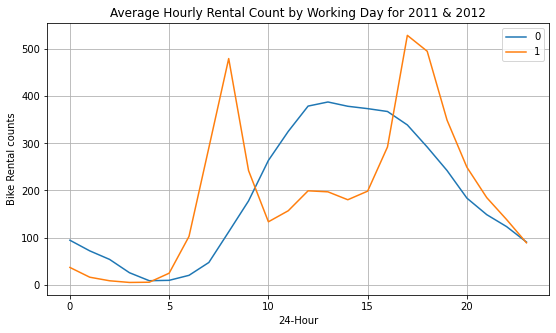

In [150]:
## Working day Average hourly bike rental for both 2011 and 2012
print("Working Day level", train["workingday"].unique())
workingday_hour = train.groupby(['workingday','hour'])
avg_workingday_hour = workingday_hour['count'].mean()
print(avg_workingday_hour)

# plot
plt.figure(figsize=(9,5))
for workingday in avg_workingday_hour.index.levels[0]:
    plt.plot(avg_workingday_hour[workingday].index, avg_workingday_hour[workingday], label=workingday)

plt.title("Average Hourly Rental Count by Working Day for 2011 & 2012")
plt.xlabel("24-Hour")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

In [151]:
## 
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb60ea407b8>,
      dtype=object)

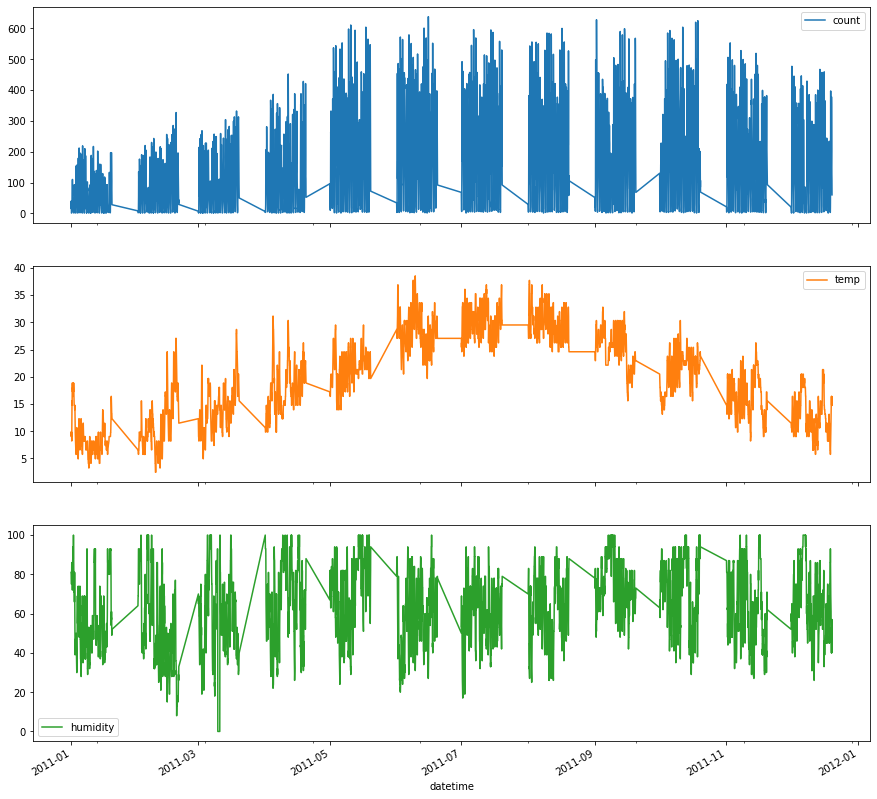

In [152]:
## Multivariate Analysis
#2011
train_2011 = train["2011"]
bike_count_2011 = train_2011[['count', 'temp', 'humidity']]
bike_count_2011.plot(subplots=True, figsize=(15, 15))


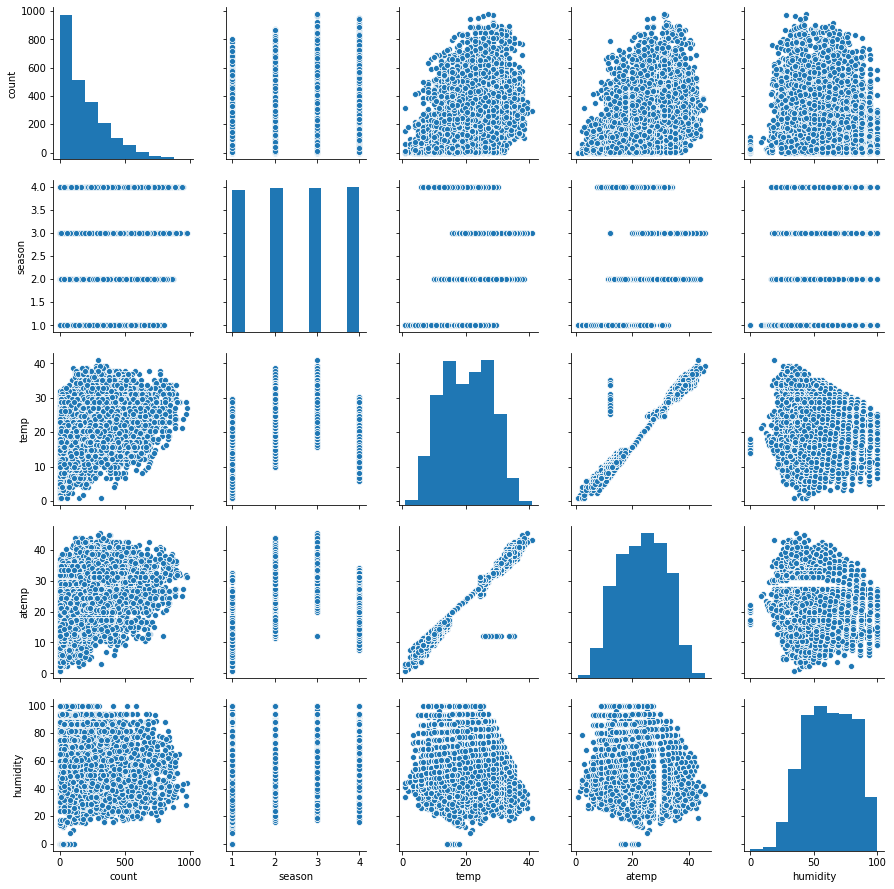

In [153]:
## pairplot
g1 = sns.pairplot(train[['count', 'season', 'temp', 'atemp', 'humidity']])

 Heat map for categorical columns: 


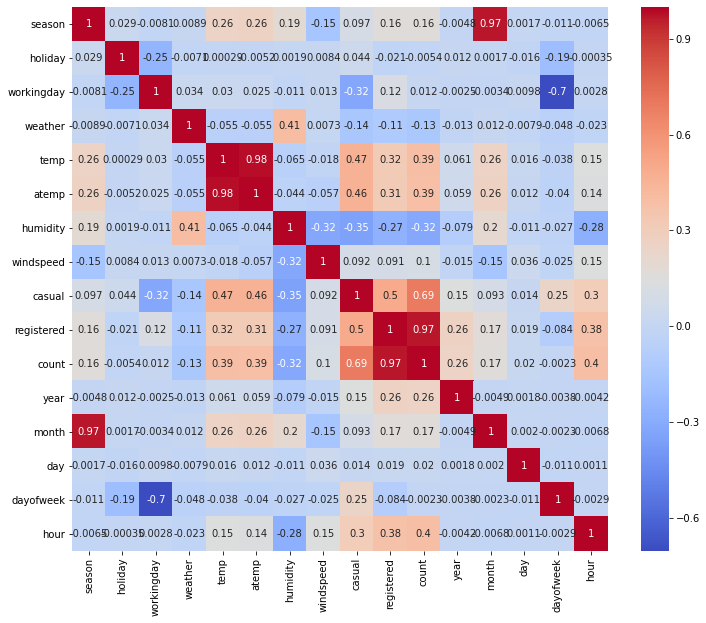

In [154]:

## Correlations between numerical features & Target feature
corr_matrix = train.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(12,10))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

In [155]:
train.columns.tolist()

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

[1 2 3 4]


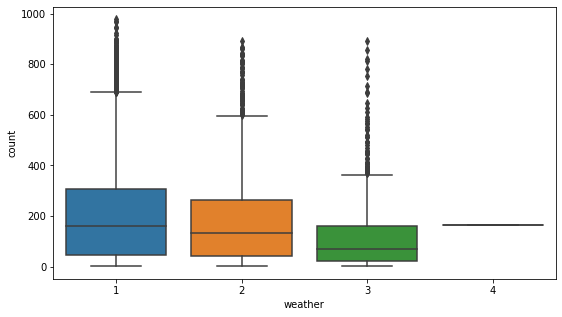

In [156]:
## Relationship between between weather and rental count
print(train["weather"].unique())
plt.figure(figsize=(9,5))
sns.boxplot(x='weather', y='count', data=train)

Text(0, 0.5, 'Bike Rental Counts')

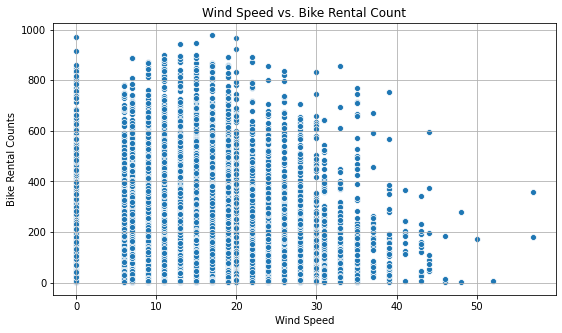

In [157]:
## Relationship between between wind speed and rental count
plt.figure(figsize=(9,5))
plt.grid(True)
sns.scatterplot(x='windspeed', y='count', data=train)
plt.title("Wind Speed vs. Bike Rental Count")
plt.xlabel("Wind Speed")
plt.ylabel("Bike Rental Counts")

- Tranforming target variable


In [158]:
train["count"] = train["count"].map(np.log1p)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


### Training and Validation Set
#### Training and validation files without column header

In [159]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(train.index)
np.random.shuffle(l) ## shuffling the train data
df_train = train.loc[l]

In [160]:
## Splitting data for train and validation
rows = df_train.shape[0]
train = int(.7 * rows)
valid = rows- train
print(rows, train, valid)

10886 7620 3266


In [161]:
## check column name
col = df_train.columns.tolist()
print(col)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day', 'dayofweek', 'hour']


In [162]:
## target variable need to first columns for the xgboost
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']

In [163]:
# Write Training Set
df_train.iloc[:train].to_csv('rob_bike_train.csv',
                             index=False,
                             header=False,
                             columns=columns)
# Write Validation Set
df_train.iloc[train:].to_csv('rob_bike_validation.csv',
                       index=False,
                       header=False,
                       columns=columns)

## check
check_train = pd.read_csv("rob_bike_train.csv", names=columns)
check_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [164]:
# Test Data has only input features
df_test.to_csv('rob_bike_test.csv', index=True, index_label='datetime')
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [165]:
print(','.join(columns))
# Write Column List
with open('rob_bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
